In [2]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [3]:
# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

## Conjunto de dados grande e ruidoso

+ Adiciona-se ruído Gaussiano branco (média 0 e variância igual 2) ao modelo gerador.

In [4]:
# Number of examples.
N = 1000000

# Attribute.
x1 = np.random.randn(N, 1)

# Create target function.
y = x1 + 0.5*x1**2

# Noisy version of the target function.
y_noisy = y + np.sqrt(2)*np.random.randn(N, 1)

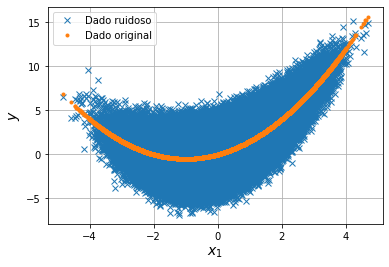

In [5]:
plt.plot(x1, y_noisy, 'x', label='Dado ruidoso')
plt.plot(x1, y, '.', label='Dado original')
plt.legend(loc='best')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.grid()
#Show the plot.
plt.show()

Degree: 1.0000 - MSE: 2.50533
Degree: 2.0000 - MSE: 2.00521
Degree: 10.0000 - MSE: 2.00518
Degree: 20.0000 - MSE: 2.00514


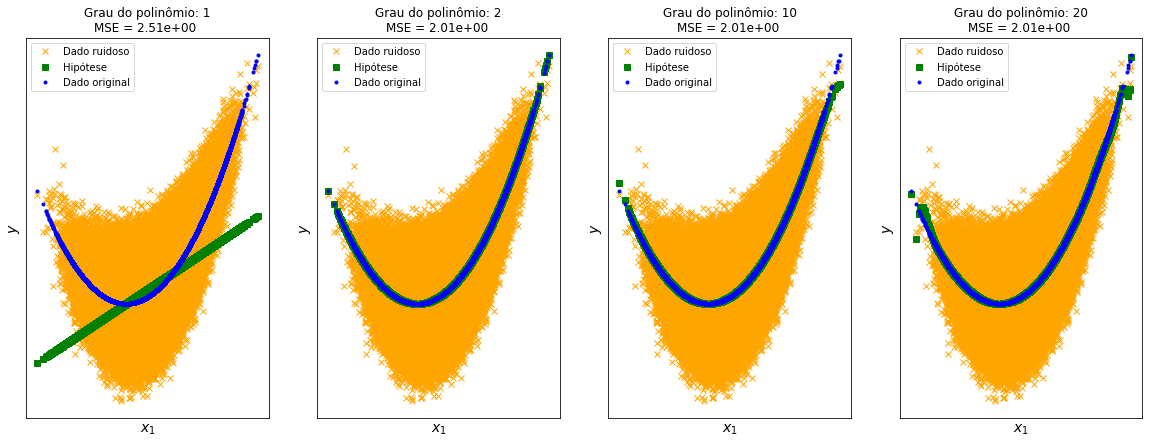

In [7]:
# Polinomial degrees to be tested.
degrees = [1, 2, 10, 20]

# Include column of ones once the target function has a bias.
include_bias = False

plt.figure(figsize=(20, 7))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())    

    # Instantiate a polynomial with the given degree.
    poly_features = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    # Train the polinomial model, i.e., the hypothesis.
    polynomial_regression.fit(x1, y_noisy)
    
    # Use the trained model for prediction.
    yp1 = polynomial_regression.predict(x1)
    
    # Calculate the Mean Squared Error (MSE) between target and predicted values.
    mse = mean_squared_error(y_noisy, yp1)
    
    print('Degree: %1.4f - MSE: %1.5f' % (degrees[i], mse))

    plt.plot(x1, y_noisy, 'x', color='orange', label='Dado ruidoso')
    plt.plot(x1, yp1, 'gs', label='Hipótese')
    plt.plot(x1, y, 'b.', label='Dado original')
    plt.legend(loc='best')
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.grid()
    plt.title("Grau do polinômio: {}\nMSE = {:.2e} ".format(degrees[i], mse))

#Show the plot.
plt.show()

**OBSERVAÇÕES**

+ Mesmo tendo um conjunto de treinamento bastante grande, o MSE tende ao valor da variância do ruído.
+ Como o número de amostras é muito maior do que as ordens escolhidas, o balanço entre bias e variância se estende por várias ordens, pois os modelos não têm flexibilidade para se ajustar ao conjunto de treinamento, apenas ao modelo gerador. 

# A influência do ruído 

Dado que temos um modelo ótimo (balanço entre viés e variância), o menor valor possível para o **erro quadrático médio** mesmo com um conjunto de treinamento grande, porém ruidoso, é determinado pela variância do ruído presente da base de dados.

Ou seja, não se pode ter um **erro quadrático médio** menor do que a variância do ruído que contaminou as amostras, a menos, claro, que o modelo esteja **sobreajustando**, aí ele tende a zero. Este erro é denominado de **erro irredutível**.

Por exemplo, considere a seguinte **função observável**

$$y_{noisy} = y + w,$$

com 

$$ y = a_1 x_1 + a_2 x_1^2,$$

e a seguinte função hipótese

$$\hat{y} = \hat{a}_1 x_1 + \hat{a}_2 x_1^2,$$

onde $w$ é ruído Guassiano com média 0 e variância igual a 2, então

$$\lim_{N \to \infty} \frac{1}{N} \sum_{n=0}^{N-1} (y_{noisy} - \hat{y})^2 
%
\\ = E[(y_{noisy} - \hat{y})^2] 
%
\\ = E[y_{noisy}^2] -2 E[y_{noisy} \hat{y}] + E[\hat{y}^2] 
%
\\= E[y^2 + 2yw + w^2] -2 E[\hat{y}y + \hat{y}w] + E[\hat{y}^2] 
%
\\= E[y^2] + E[w^2] -2 E[\hat{y}y]  + E[\hat{y}^2],$$

onde a penúltima igualdade é obtida usando-se $y_{noisy} = y + w$.

No caso ideal, onde $\hat{a}_1 =  a_1$  e $\hat{a}_2 = a_2$, então $\hat{y} = y$, portanto

$$\lim_{N \to \infty} \frac{1}{N} \sum_{n=0}^{N-1} (y_{noisy} - \hat{y})^2  = E[y^2] -2 E[y^2] + E[y^2] + E[w^2] = E[w^2].$$

No caso do exemplo acima, a variância de $w$ é igual a $2$ e portanto o erro quadrático médio irá tender a $2$ como visto.